# Are graph embeddings continuous? (Embedding by random walk matrix factorization)

Example of a chain of $N$ vertices and a cycle made of the same vertices. Both graphs are connected, so according to the continuity theorem for eigenvectors, their random walk factorization embeddings should be close. This notebook verifies this fact empirically.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from copy import deepcopy

from graph_embedding_continuity import *

In [2]:
N = 20

## Continuous embedding under removal of an edge (while keeping the graph connected)

In [3]:
chain = generate_chain(N)
cycle = generate_cycle(N)

# add some random weights on each edge,
# same weight for the edges common to
# the chain and the cycle.
shared_weights = np.random.rand(N-1)

for v, _ in chain.edges():
    chain[v][v+1]['weight'] = shared_weights[v]
    cycle[v][v+1]['weight'] = shared_weights[v]

# put a tiny weight on the closing edge of the cycle.
cycle[N-1][0]['weight'] = 0.01*np.random.rand()

# save layout
pos = nx.shell_layout(cycle)

### Standard random walk

In [4]:
emb_cycle_std = rw_factorization_embedding(cycle, k=3, p=1.0, q=1.0, normalize=True, use_sparse=False)
emb_chain_std = rw_factorization_embedding(chain, k=3, p=1.0, q=1.0, normalize=True, use_sparse=False)

### Depth-first incentive

In [5]:
emb_cycle_dfs = rw_factorization_embedding(cycle, k=3, p=1.0, q=1/3, normalize=True, use_sparse=False)
emb_chain_dfs = rw_factorization_embedding(chain, k=3, p=1.0, q=1/3, normalize=True, use_sparse=False)

### Breadth-first incentive

In [6]:
emb_cycle_bfs = rw_factorization_embedding(cycle, k=3, p=1.0, q=3.0, normalize=True, use_sparse=False)
emb_chain_bfs = rw_factorization_embedding(chain, k=3, p=1.0, q=3.0, normalize=True, use_sparse=False)

### Comparison

/home/sauxpa/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


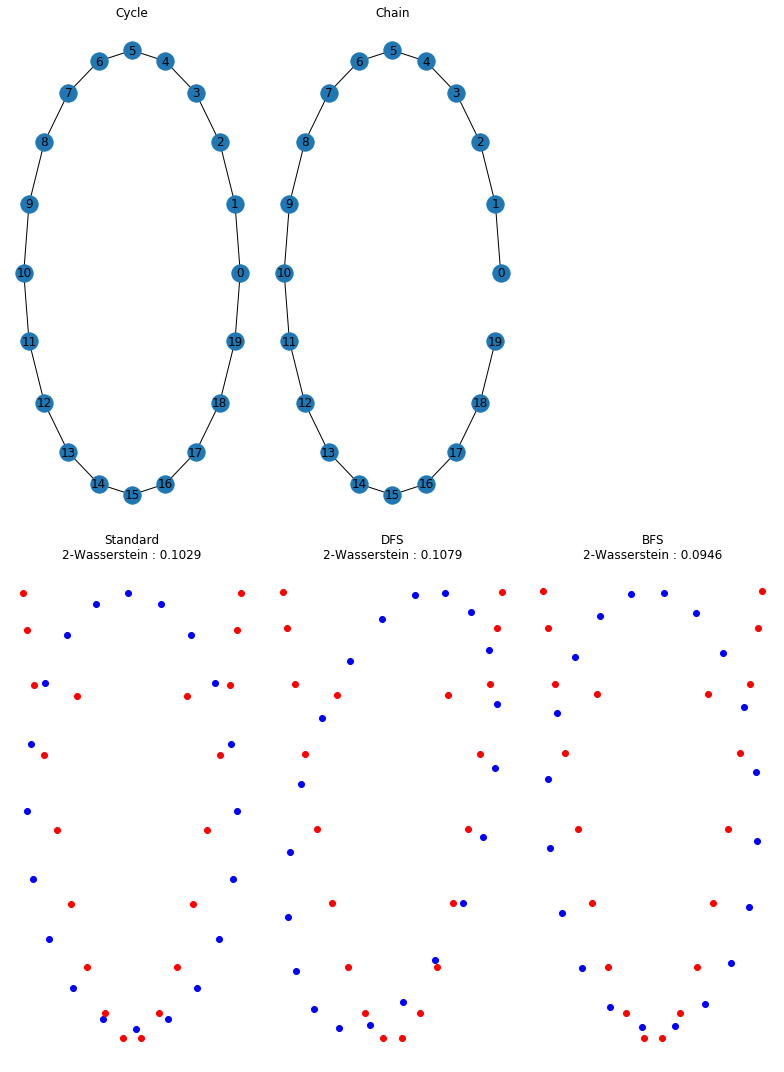

In [7]:
# plot the graph
fig, axes = plt.subplots(figsize=(11,15), nrows=2, ncols=3)

emb_cycle_std = emb_cycle_std[:, 1:]
emb_cycle_dfs = emb_cycle_dfs[:, 1:]
emb_cycle_bfs = emb_cycle_bfs[:, 1:]

emb_chain_std = emb_chain_std[:, 1:]
emb_chain_dfs = emb_chain_dfs[:, 1:]
emb_chain_bfs = emb_chain_bfs[:, 1:]

wass_std = wasserstein_metric(emb_cycle_std, emb_chain_std)
wass_dfs = wasserstein_metric(emb_cycle_dfs, emb_chain_dfs)
wass_bfs = wasserstein_metric(emb_cycle_bfs, emb_chain_bfs)

ax = axes[0, 0]
nx.draw_networkx(cycle, pos=pos, ax=ax)
ax.set_title('Cycle')
ax.axis('off')

ax = axes[0, 1]
nx.draw_networkx(chain, pos=pos, ax=ax)
ax.set_title('Chain')
ax.axis('off')

ax = axes[0, 2]
ax.axis('off')

ax = axes[1, 0]
ax.scatter(emb_cycle_std[:, 0], emb_cycle_std[:, 1], label='cycle', color='b')
ax.scatter(emb_chain_std[:, 0], emb_chain_std[:, 1], label='chain', color='r')
ax.set_title('Standard\n2-Wasserstein : {:.4f}'.format(wass_std))
# ax.legend()
ax.axis('off')

ax = axes[1, 1]
ax.scatter(emb_cycle_dfs[:, 0], emb_cycle_dfs[:, 1], label='cycle', color='b')
ax.scatter(emb_chain_dfs[:, 0], emb_chain_dfs[:, 1], label='chain', color='r')
ax.set_title('DFS\n2-Wasserstein : {:.4f}'.format(wass_dfs))
# ax.legend()
ax.axis('off')

ax = axes[1, 2]
ax.scatter(emb_cycle_bfs[:, 0], emb_cycle_bfs[:, 1], label='cycle', color='b')
ax.scatter(emb_chain_bfs[:, 0], emb_chain_bfs[:, 1], label='chain', color='r')
ax.set_title('BFS\n2-Wasserstein : {:.4f}'.format(wass_bfs))
# ax.legend()
ax.axis('off')

plt.tight_layout()
plt.show()

fig.savefig('rw_factorization_chain_cycle.eps')